In [1]:
# after implementing new envelope misfit function,
# would like to check gradient consistency
# the testdata/testsrc setup could be used for that.

In [2]:
# what we need for preparation:
# - compute the gradient for the input source
# - have a vector of smaller and smaller steps
# - have a random update to the model
# - compute m0

# what we do then for each step in the step vector:
# - scale the random update by this step
# - compute the model of the input plus the update
# - get the misfit of that model output
# - get the relative error between this misfit and m0
# - record (step,relative error)

In [34]:
import os
import numpy as np
from pandas import read_csv
import h5py
import matplotlib.pyplot as plt

In [35]:
# compute the gradient for the input model
os.system('cp -R ../test/testdata/testsrc/wavefield_processed_archived/ \
          ../test/testdata/testsrc/wavefield_processed')
os.system('cp ../test/testdata/testsrc/step_0/starting_model_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
os.mkdir('../test/testdata/testsrc/step_0/corr')
os.mkdir('../test/testdata/testsrc/step_0/adjt')
os.mkdir('../test/testdata/testsrc/step_0/kern')
os.mkdir('../test/testdata/testsrc/step_0/grad')
os.system('cp inputs/measr_config.json ../test/testdata/testsrc/')
os.system('cp inputs/source_config.json ../test/testdata/testsrc/')
os.system('cp inputs/config.json ../test/testdata/')

0

In [36]:
os.system('noisi correlation ../test/testdata/testsrc 0')
### remove output after finishing

0

In [37]:
os.system('noisi measurement ../test/testdata/testsrc 0')
m0 = read_csv('../test/testdata/testsrc/step_0/\
square_envelope.0.measurement.csv')['l2_norm'][0]
print(m0)

0.259406780548


In [38]:
os.system('noisi kernel ../test/testdata/testsrc 0')

0

In [39]:
os.system('noisi gradient ../test/testdata/testsrc 0')

0

In [46]:
eps = np.arange(-3,3,1.)

In [47]:
grad = np.load('../test/testdata/testsrc/step_0/grad/grad_all.npy')

In [48]:
direction = (np.random.random((grad.shape))-0.5)

In [49]:
m_grad = np.dot(direction,np.transpose(grad))[0]
print(m_grad)

[-0.00013169]


In [50]:
def get_misfit_from_direction(dvec):
    
    os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
    
    os.system('cp ../test/testdata/testsrc/step_0/starting_model_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
    f = h5py.File('../test/testdata/testsrc/step_0/starting_model.h5','a')
    f['distr_basis'][:] += dvec
    f.close()

    
    os.system('rm ../test/testdata/testsrc/step_0/corr/\
NET.STA1..CHA--NET.STA2..CHA.sac')
    
    os.system('rm ../test/testdata/testsrc/step_0/\
square_envelope.0.measurement.csv')
    
    os.system('noisi correlation ../test/testdata/testsrc 0')
    os.system('noisi measurement ../test/testdata/testsrc 0')
    msr = read_csv('../test/testdata/testsrc/step_0/\
square_envelope.0.measurement.csv')
    msr = msr['l2_norm'][0]
    
    return(msr)
    
    
    

0
-0.0303052294847
229.122967839
1
-0.0303061650617
229.130072149
2
-0.0303037462432
229.111704835
3
-0.0300354095672
227.074088446
4
-0.00320540021412
23.3402284995
5
2.67987295856
20350.6336818


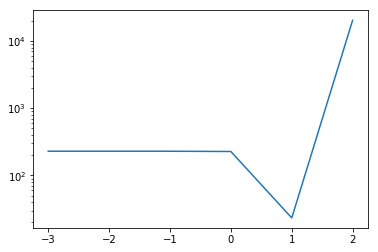

In [51]:
results = np.zeros(len(eps))

for i in range(len(eps)):
    print(i)
    val = 10**eps[i]
    msr1 = get_misfit_from_direction(val*direction)
    msr2 = get_misfit_from_direction(-val*direction)
    mf_approx = 1./(2.*val)*(msr1-msr2)
    print(mf_approx)
    results[i] = np.abs(m_grad-mf_approx)/np.abs(m_grad)
    
    print(results[i])
    
plt.semilogy(eps,results)
plt.show()

In [33]:
# removing copied files...
os.system('rm -rf ../test/testdata/testsrc/wavefield_processed')
os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
os.system('rm -rf ../test/testdata/testsrc/step_0/corr')
os.system('rm -rf ../test/testdata/testsrc/step_0/adjt')
os.system('rm -rf ../test/testdata/testsrc/step_0/kern')
os.system('rm -rf ../test/testdata/testsrc/step_0/grad')
os.system('rm ../test/testdata/testsrc/measr_config.json')
os.system('rm ../test/testdata/testsrc/source_config.json')
os.system('rm ../test/testdata/config.json')

0

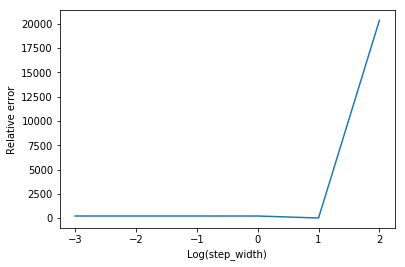

In [53]:
plt.plot(eps,results)
plt.xlabel('Log(step_width)')
plt.ylabel('Relative error')
plt.show()

In [34]:
print(msr2)

22.8095077533
